**Jarrian Vince G. Gojar**\
Instructor I\
*College of Information and Communications Technology, Sorsogon State University, Philippines*

# Introduction

In images, `lines` and `shapes` are the most common objects that we can
detect. These can be detected using the `Hough Line Transform` and
`Hough Circle Transform` respectively. In OpenCV, the shapes that can
be detected are circles, and ellipses. Other shapes can be detected by
using the `Hough Line Transform` or by using `Contours`.

**Read More:**

- [Hough Line Transform](https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html)
- [Hough Circle Transform](https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html)

# Setup

In [ ]:
%pip install opencv-python opencv-contrib-python numpy matplotlib

# Initial Setup

In [7]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Asset Root
asset_root = '../../assets/'

# Detection of Lines

The `Hough Line Transform` is a technique to detect lines in an image.
It is a popular technique to detect any shape, if you can represent that
shape in a mathematical form. It can detect the lines even if the lines
are broken or distorted a little bit. It is robust in the sense that it
can detect the lines even if the image is noisy.

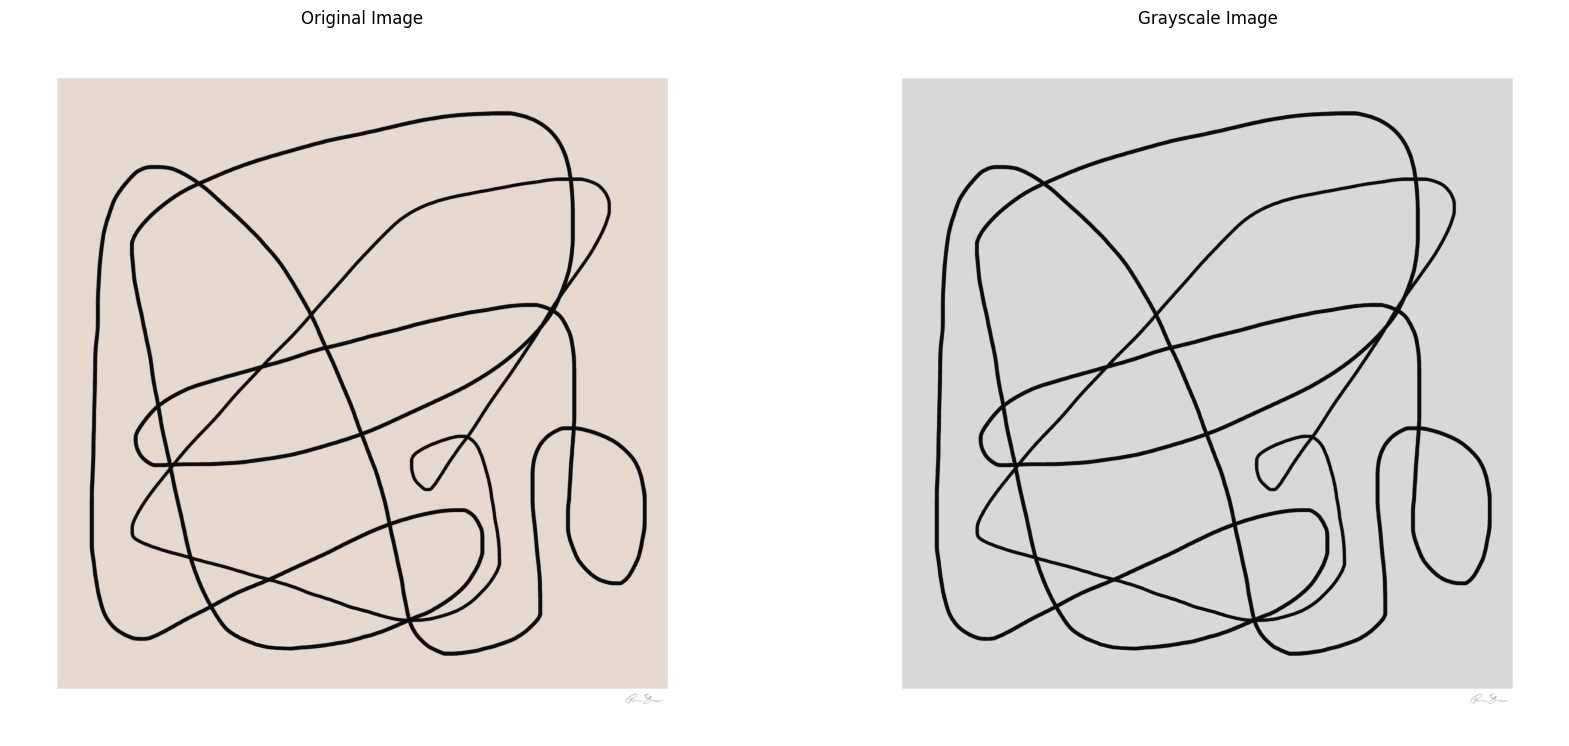

In [8]:
# Image Path
image_path = asset_root + '/images/abstract_lines.jpg'

# Read Image and convert to RGB
input_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Convert Image to Grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Display Both Image
plt.figure("Lines", figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.show()

The `Hough Line Transform` is a `transform` used to detect the lines in
an image. To apply the `Hough Line Transform`, we need to follow the
following steps:

- Convert the image to a grayscale image.
- Apply the `Canny Edge Detector` to detect the edges.
- Apply the `Hough Line Transform` to detect the lines.
- Draw the lines on the original image.

The `Hough Line Transform` is implemented in OpenCV using the
`cv2.HoughLinesP` function. The function takes the following parameters:

- `image`: The input image.
- `rho`: The resolution of the parameter `r` in pixels which is the
    distance resolution of the accumulator in pixels.
- `theta`: The resolution of the parameter `θ` in radians which is the
    angle resolution of the accumulator in radians.
- `threshold`: The minimum number of intersections to detect a line.
- `minLineLength`: The minimum length of the line in pixels.
- `maxLineGap`: The maximum gap between the lines in pixels.

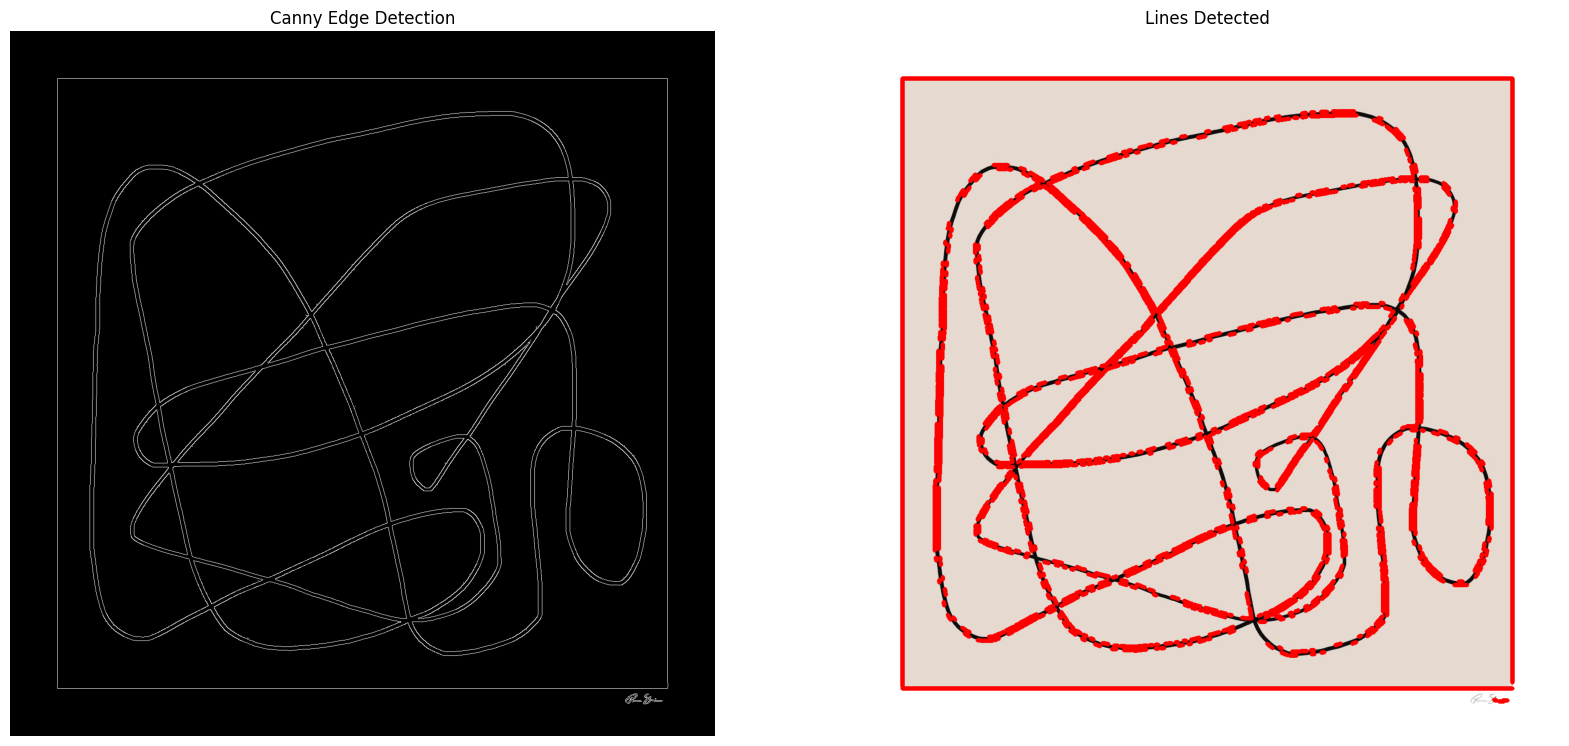

In [9]:
# Apply Canny Edge Detection
edges = cv2.Canny(gray_image, 50, 120)

# Apply Hough Line Transform
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 20, minLineLength, maxLineGap)

# Copy Image
input_image_lines = input_image.copy()

# Draw Lines on Original Image
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(input_image_lines, (x1, y1), (x2, y2), (255, 0, 0), 8)

# Display Image
plt.figure("Lines", figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(input_image_lines)
plt.title("Lines Detected")
plt.axis('off')

plt.show()

**Read More:**

- [Line Detection](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb)
- [Hough Line Transform](https://docs.opencv.org/4.x/d9/db0/tutorial_hough_lines.html)
- [Canny Edge Detection](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)

# Detection of Circles

The `Hough Circle Transform` is a technique to detect circles in an image.
It works in a similar way to the `Hough Line Transform`. The `Hough Circle
Transform` is implemented in OpenCV using the `cv2.HoughCircles` function.

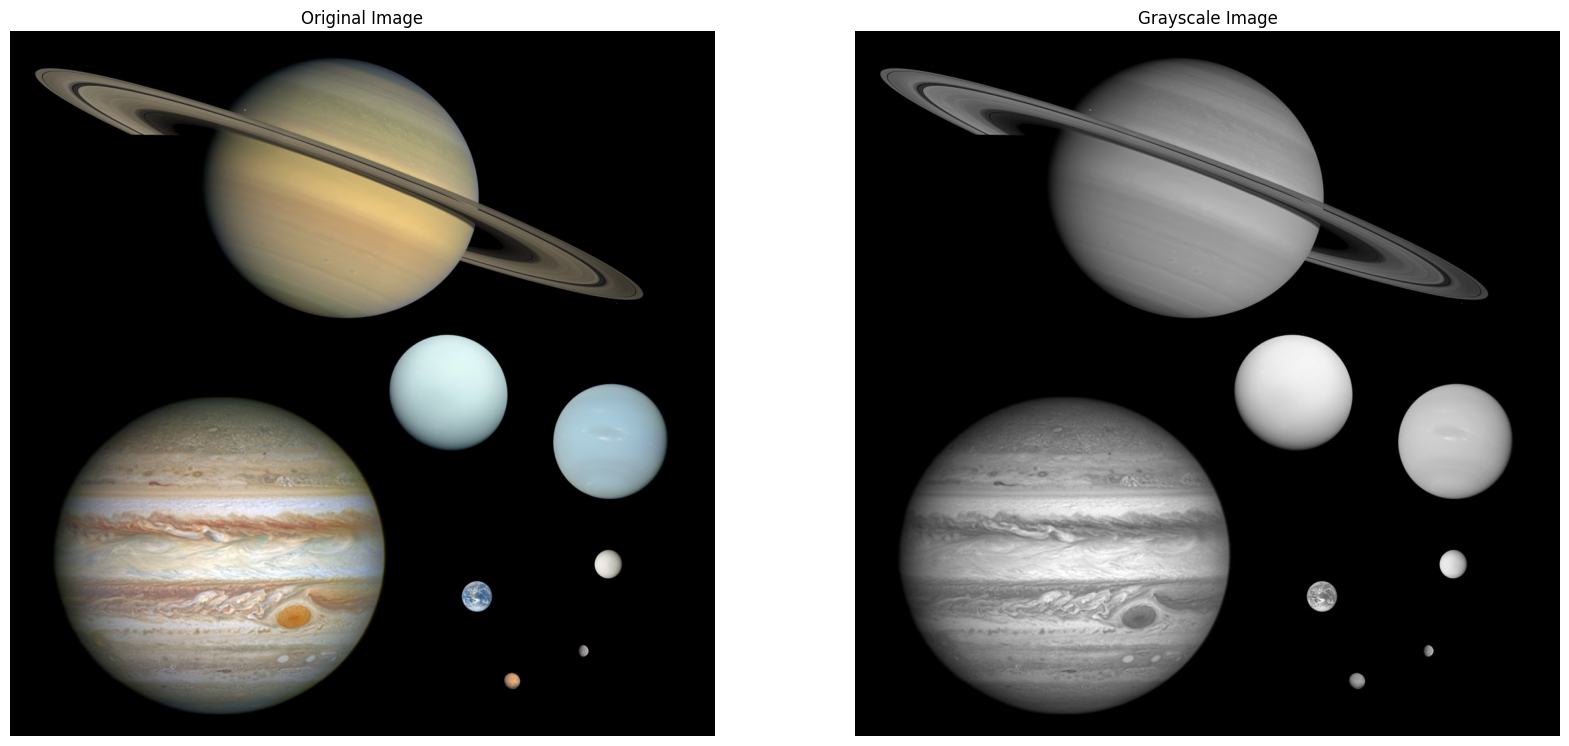

In [10]:
# Image Path
image_path = asset_root + '/images/solar_system.jpg'

# Read Image and convert to RGB
input_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Convert Image to Grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Display Both Image
plt.figure("Solar System", figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.show()

To apply the `Hough Circle Transform`, we need to follow the following
steps:

- Convert the image to a grayscale image.
- Apply the `Median Blur` to reduce the noise.
- Apply the `Hough Circle Transform` to detect the circles.
- Draw the circles on the original image.

The `Hough Circle Transform` is implemented in OpenCV using the
`cv2.HoughCircles` function. The function takes the following parameters:

- `image`: The input image.
- `method`: The method of detecting the circles.
- `dp`: The inverse ratio of the accumulator resolution to the image
    resolution.
- `minDist`: The minimum distance between the centers of the detected
    circles.
- `param1`: The higher threshold of the two passed to the `Canny`
    edge detector.
- `param2`: The accumulator threshold for the circle centers at the
    detection stage.
- `minRadius`: The minimum radius of the circles.
- `maxRadius`: The maximum radius of the circles. 

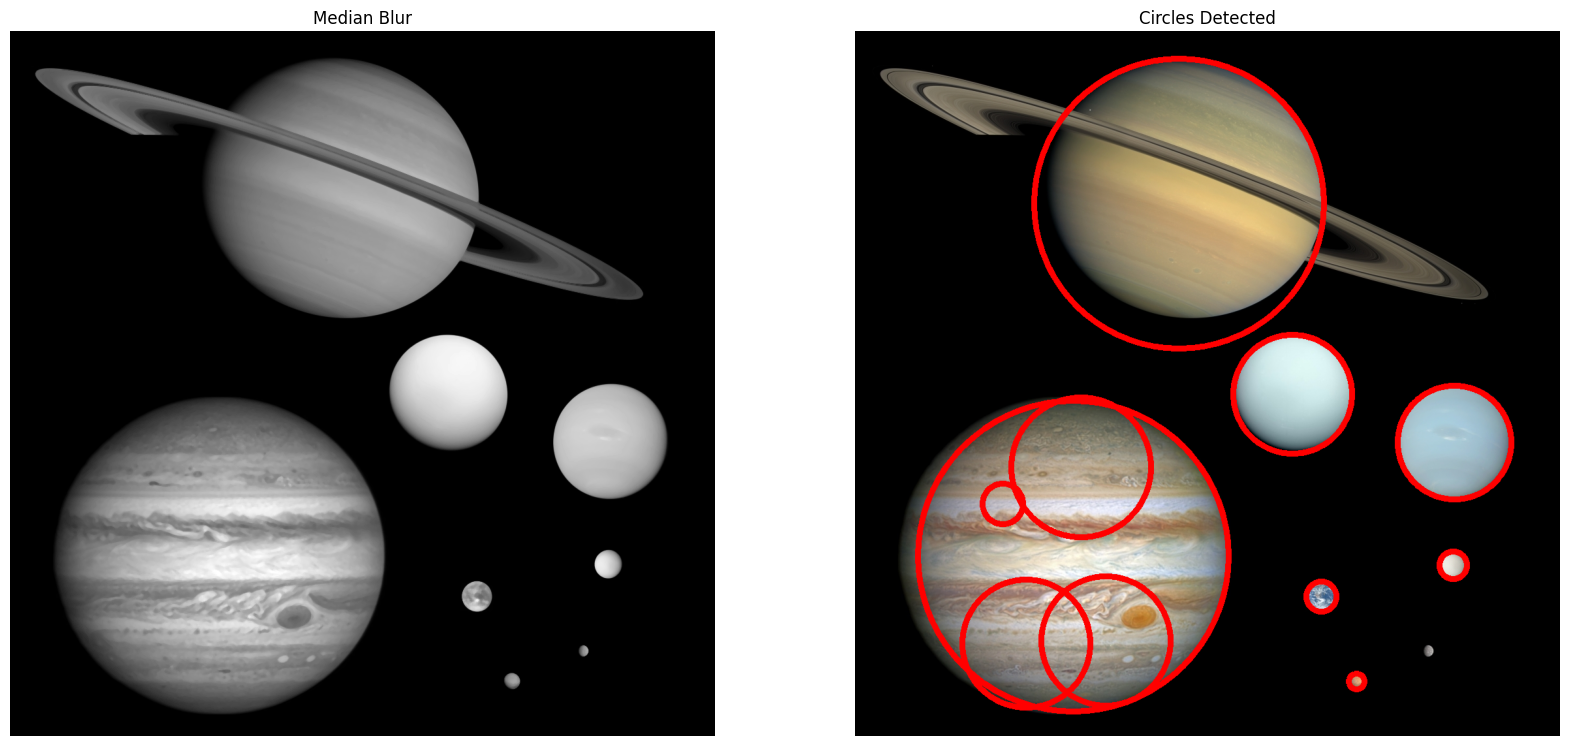

In [11]:
# Apply Median Blur
median_blur = cv2.medianBlur(gray_image, 5)

# Apply Hough Circle Transform
min_radius = 0
max_radius = 240
circles = cv2.HoughCircles(median_blur, cv2.HOUGH_GRADIENT, 1, 120, param1=100, param2=30, minRadius=min_radius, maxRadius=max_radius)
circles = np.uint16(np.around(circles))

# Copy Image
input_image_circles = input_image.copy()

# Draw Circles on Original Image
for circle in circles[0, :]:
    center = (circle[0], circle[1])
    radius = circle[2]
    cv2.circle(input_image_circles, center, radius, (255, 0, 0), 8)
    
# Display Image
plt.figure("Solar System", figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(median_blur, cmap='gray')
plt.title("Median Blur")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(input_image_circles)
plt.title("Circles Detected")
plt.axis('off')

plt.show()

**Read More:**

- [Circle Detection](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)
- [Hough Circle Transform](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)
- [Median Blur](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9)

# Detecting Other Shapes

Finding other shapes in an image is a challenging task. The `Hough Line
Transform` and the `Hough Circle Transform` can only detect lines and
circles respectively. To detect other shapes, we need to use other
techniques. One of the techniques is to use the `Contours` in OpenCV.
This can be done using the `cv2.findContours` function along with the
`cv2.approxPolyDP` function for approximating the contours.

# Summary

- `Hough Line Transform` is used to detect lines in an image.
- `Hough Circle Transform` is used to detect circles in an image.
- `Canny Edge Detection` is used to detect edges in an image.
- `Median Blur` is used to remove noise from an image.
- For detecting shapes other than lines and circles, we can use
`Contours`.

# References

- Thomas G. (2022). Graphic Designing: A Step-by-Step Guide (Advanced). Larsen & Keller. ISBN: 978-1-64172-536-1
- Singh M. (2022). Computer Graphics and Multimedia. Random Publications LLP. ISBN: 978-93-93884-95-4
- Singh M. (2022). Computer Graphics Science. Random Publications LLP. ISBN: 978-93-93884-03-9
- Singh M. (2022). Computer Graphics Software. Random Publications LLP. ISBN: 9789393884114
- Tyagi, V. (2021). Understanding Digital Image Processing. CRC Press.
- Ikeuchi, K. (Ed.). (2021). Computer Vision: A Reference Guide (2nd ed.). Springer.
- Bhuyan, M. K. (2020). Computer Vision and Image Processing. CRC Press.
- Howse, J., & Minichino, J. (2020). Learning OpenCV 4 Computer Vision with Python 3: Get to grips with tools, techniques, and algorithms for computer vision and machine learning. Packt Publishing Ltd.
- Kinser, J. M. (2019). Image Operators: Image Processing in Python. CRC Press.
